### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [2]:
key=""

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\Farmaan\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-09-23 00:00:00+00:00,112.71,114.79,111.55,114.42,52481151,26.421228,26.908817,26.149304,26.822083,209924604,0.0,1.0
1,AAPL,2016-09-26 00:00:00+00:00,112.88,113.39,111.55,111.64,29869442,26.461079,26.580632,26.149304,26.170401,119477768,0.0,1.0
2,AAPL,2016-09-27 00:00:00+00:00,113.09,113.18,112.34,113.00,24607412,26.510307,26.531404,26.334494,26.489209,98429648,0.0,1.0
3,AAPL,2016-09-28 00:00:00+00:00,113.95,114.64,113.43,113.69,29641085,26.711906,26.873654,26.590009,26.650958,118564340,0.0,1.0
4,AAPL,2016-09-29 00:00:00+00:00,112.18,113.80,111.80,113.16,35886990,26.296987,26.676744,26.207908,26.526716,143547960,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2021-09-14 00:00:00+00:00,148.12,151.07,146.910,150.35,109296295,148.12,151.07,146.910,150.35,109296295,0.0,1.0
1252,AAPL,2021-09-15 00:00:00+00:00,149.03,149.44,146.370,148.56,83281315,149.03,149.44,146.370,148.56,83281315,0.0,1.0
1253,AAPL,2021-09-16 00:00:00+00:00,148.79,148.97,147.221,148.44,68034149,148.79,148.97,147.221,148.44,68034149,0.0,1.0
1254,AAPL,2021-09-17 00:00:00+00:00,146.06,148.82,145.760,148.82,129868824,146.06,148.82,145.760,148.82,129868824,0.0,1.0
1255,AAPL,2021-09-20 00:00:00+00:00,142.94,144.84,141.270,143.80,123478863,142.94,144.84,141.270,143.80,123478863,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       112.71
1       112.88
2       113.09
3       113.95
4       112.18
         ...  
1251    148.12
1252    149.03
1253    148.79
1254    146.06
1255    142.94
Name: close, Length: 1256, dtype: float64

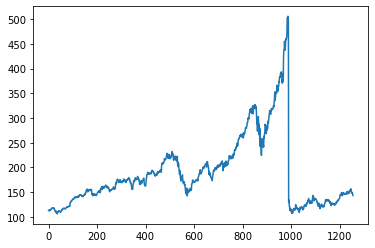

In [10]:
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.01748339]
 [0.01790799]
 [0.01843249]
 ...
 [0.10759778]
 [0.10077926]
 [0.09298666]]


In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(816, 440)

In [16]:
train_data

array([[0.01748339],
       [0.01790799],
       [0.01843249],
       [0.02058045],
       [0.01615965],
       [0.01833258],
       [0.01700884],
       [0.0182077 ],
       [0.01833258],
       [0.02043059],
       [0.02085519],
       [0.02582547],
       [0.02644987],
       [0.0290474 ],
       [0.02814826],
       [0.02977172],
       [0.02957191],
       [0.0293721 ],
       [0.02849793],
       [0.02834807],
       [0.02719916],
       [0.02982167],
       [0.03132025],
       [0.02467656],
       [0.02190419],
       [0.02000599],
       [0.01955642],
       [0.01443629],
       [0.01468605],
       [0.01029022],
       [0.00781757],
       [0.01173885],
       [0.01336231],
       [0.01291273],
       [0.00519506],
       [0.00679355],
       [0.        ],
       [0.00349668],
       [0.01068984],
       [0.01058994],
       [0.01086468],
       [0.01503572],
       [0.01521055],
       [0.0137869 ],
       [0.01518557],
       [0.0146361 ],
       [0.01436136],
       [0.012

In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 430ms/step - loss: 0.0125 - val_loss: 0.0345
Epoch 2/100
12/12 [==============================] - 3s 228ms/step - loss: 0.0026 - val_loss: 0.0258
Epoch 3/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0015 - val_loss: 0.0217
Epoch 4/100
12/12 [==============================] - 2s 204ms/step - loss: 7.0243e-04 - val_loss: 0.0217
Epoch 5/100
12/12 [==============================] - 2s 189ms/step - loss: 4.9138e-04 - val_loss: 0.0267
Epoch 6/100
12/12 [==============================] - 2s 200ms/step - loss: 5.1364e-04 - val_loss: 0.0241
Epoch 7/100
12/12 [==============================] - 2s 194ms/step - loss: 4.6366e-04 - val_loss: 0.0228
Epoch 8/100
12/12 [==============================] - 2s 200ms/step - loss: 4.6769e-04 - val_loss: 0.0241
Epoch 9/100
12/12 [==============================] - 3s 216ms/step - loss: 4.6906e-04 - val_loss: 0.0235
Epoch 10/100
12/12 [==============================] - 2s 197ms/ste

12/12 [==============================] - 2s 192ms/step - loss: 1.6534e-04 - val_loss: 0.0087
Epoch 79/100
12/12 [==============================] - 2s 185ms/step - loss: 1.6624e-04 - val_loss: 0.0082
Epoch 80/100
12/12 [==============================] - 2s 181ms/step - loss: 1.6826e-04 - val_loss: 0.0077
Epoch 81/100
12/12 [==============================] - 2s 183ms/step - loss: 1.8203e-04 - val_loss: 0.0080
Epoch 82/100
12/12 [==============================] - 2s 190ms/step - loss: 1.7137e-04 - val_loss: 0.0092
Epoch 83/100
12/12 [==============================] - 2s 191ms/step - loss: 1.6456e-04 - val_loss: 0.0078
Epoch 84/100
12/12 [==============================] - 2s 190ms/step - loss: 1.6345e-04 - val_loss: 0.0083
Epoch 85/100
12/12 [==============================] - 2s 190ms/step - loss: 1.5936e-04 - val_loss: 0.0084
Epoch 86/100
12/12 [==============================] - 2s 189ms/step - loss: 1.8904e-04 - val_loss: 0.0075
Epoch 87/100
12/12 [==============================] - 3s 23

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.6.0'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

187.07253011594867

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

222.72208540668822

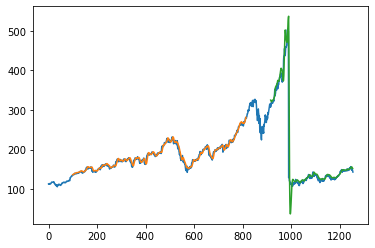

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

440

In [34]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.06935910884659574,
 0.06431390179329638,
 0.06701133922773367,
 0.05529746740596431,
 0.05592187421949146,
 0.06001798291622962,
 0.061191867725660654,
 0.05279984015185574,
 0.050452070532993665,
 0.04260952095509268,
 0.04810430091413159,
 0.054298416504320934,
 0.05135121634447276,
 0.04780458564363854,
 0.04740496528298116,
 0.05394874868874572,
 0.04925320945102157,
 0.05342424696538289,
 0.05292472151456118,
 0.05279984015185574,
 0.048878565362905246,
 0.047205155102652496,
 0.04638093810879668,
 0.04832908736700137,
 0.04453269394075632,
 0.0504021179879115,
 0.05042709426045261,
 0.0525251011539038,
 0.05349917578300617,
 0.05095159598381538,
 0.05404865377891005,
 0.06186622708426992,
 0.05976822019081868,
 0.061042010090414156,
 0.0651381187871522,
 0.06181627453918781,
 0.06641190868674762,
 0.07060792247365,
 0.06990858684249962,
 0.06918427493880813,
 0.06843498676257559,
 0.07260602427693691,
 0.07647734652080529,
 0.07805085169089365,
 0.07882511613966736,
 0.0855437

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10915758]
101
1 day input [0.0643139  0.06701134 0.05529747 0.05592187 0.06001798 0.06119187
 0.05279984 0.05045207 0.04260952 0.0481043  0.05429842 0.05135122
 0.04780459 0.04740497 0.05394875 0.04925321 0.05342425 0.05292472
 0.05279984 0.04887857 0.04720516 0.04638094 0.04832909 0.04453269
 0.05040212 0.05042709 0.0525251  0.05349918 0.0509516  0.05404865
 0.06186623 0.05976822 0.06104201 0.06513812 0.06181627 0.06641191
 0.07060792 0.06990859 0.06918427 0.06843499 0.07260602 0.07647735
 0.07805085 0.07882512 0.08554373 0.09068885 0.0970578  0.09373595
 0.09840651 0.09688296 0.09973026 0.10849693 0.10682352 0.10160348
 0.09176283 0.10100405 0.09913083 0.1026275  0.10702333 0.10809731
 0.10255258 0.09808182 0.09973026 0.10027973 0.09943054 0.10402618
 0.10300215 0.10327689 0.10097907 0.10085419 0.09963035 0.10027973
 0.10784754 0.10837205 0.11341725 0.11109446 0.10152855 0.10237774
 0.10609921 0.1098956  0.10967081 0.1065238  0.10447575 0.10712323
 0.11841251 0.11519057 0.11688896

9 day output [[0.11196616]]
10 day input [0.0481043  0.05429842 0.05135122 0.04780459 0.04740497 0.05394875
 0.04925321 0.05342425 0.05292472 0.05279984 0.04887857 0.04720516
 0.04638094 0.04832909 0.04453269 0.05040212 0.05042709 0.0525251
 0.05349918 0.0509516  0.05404865 0.06186623 0.05976822 0.06104201
 0.06513812 0.06181627 0.06641191 0.07060792 0.06990859 0.06918427
 0.06843499 0.07260602 0.07647735 0.07805085 0.07882512 0.08554373
 0.09068885 0.0970578  0.09373595 0.09840651 0.09688296 0.09973026
 0.10849693 0.10682352 0.10160348 0.09176283 0.10100405 0.09913083
 0.1026275  0.10702333 0.10809731 0.10255258 0.09808182 0.09973026
 0.10027973 0.09943054 0.10402618 0.10300215 0.10327689 0.10097907
 0.10085419 0.09963035 0.10027973 0.10784754 0.10837205 0.11341725
 0.11109446 0.10152855 0.10237774 0.10609921 0.1098956  0.10967081
 0.1065238  0.10447575 0.10712323 0.11841251 0.11519057 0.11688896
 0.11973625 0.12135971 0.12732904 0.12338279 0.12078525 0.10804736
 0.10949598 0.10592437

18 day output [[0.12217277]]
19 day input [0.05279984 0.04887857 0.04720516 0.04638094 0.04832909 0.04453269
 0.05040212 0.05042709 0.0525251  0.05349918 0.0509516  0.05404865
 0.06186623 0.05976822 0.06104201 0.06513812 0.06181627 0.06641191
 0.07060792 0.06990859 0.06918427 0.06843499 0.07260602 0.07647735
 0.07805085 0.07882512 0.08554373 0.09068885 0.0970578  0.09373595
 0.09840651 0.09688296 0.09973026 0.10849693 0.10682352 0.10160348
 0.09176283 0.10100405 0.09913083 0.1026275  0.10702333 0.10809731
 0.10255258 0.09808182 0.09973026 0.10027973 0.09943054 0.10402618
 0.10300215 0.10327689 0.10097907 0.10085419 0.09963035 0.10027973
 0.10784754 0.10837205 0.11341725 0.11109446 0.10152855 0.10237774
 0.10609921 0.1098956  0.10967081 0.1065238  0.10447575 0.10712323
 0.11841251 0.11519057 0.11688896 0.11973625 0.12135971 0.12732904
 0.12338279 0.12078525 0.10804736 0.10949598 0.10592437 0.10819721
 0.10759778 0.10077926 0.09298666 0.10915758 0.10690239 0.10585508
 0.10577185 0.106324

27 day output [[0.13066225]]
28 day input [0.05349918 0.0509516  0.05404865 0.06186623 0.05976822 0.06104201
 0.06513812 0.06181627 0.06641191 0.07060792 0.06990859 0.06918427
 0.06843499 0.07260602 0.07647735 0.07805085 0.07882512 0.08554373
 0.09068885 0.0970578  0.09373595 0.09840651 0.09688296 0.09973026
 0.10849693 0.10682352 0.10160348 0.09176283 0.10100405 0.09913083
 0.1026275  0.10702333 0.10809731 0.10255258 0.09808182 0.09973026
 0.10027973 0.09943054 0.10402618 0.10300215 0.10327689 0.10097907
 0.10085419 0.09963035 0.10027973 0.10784754 0.10837205 0.11341725
 0.11109446 0.10152855 0.10237774 0.10609921 0.1098956  0.10967081
 0.1065238  0.10447575 0.10712323 0.11841251 0.11519057 0.11688896
 0.11973625 0.12135971 0.12732904 0.12338279 0.12078525 0.10804736
 0.10949598 0.10592437 0.10819721 0.10759778 0.10077926 0.09298666
 0.10915758 0.10690239 0.10585508 0.10577185 0.10632475 0.10724326
 0.10834715 0.1095328  0.11074727 0.11196616 0.11317825 0.11437776
 0.1155607  0.116723

In [44]:
day_new=np.arange(1,99)
day_pred=np.arange(99,129)

In [45]:
len(df1)

1256

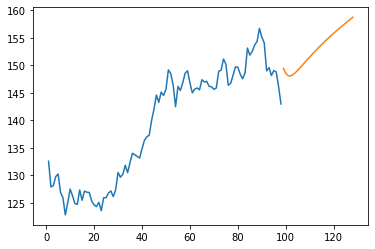

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

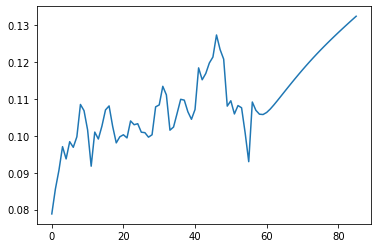

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

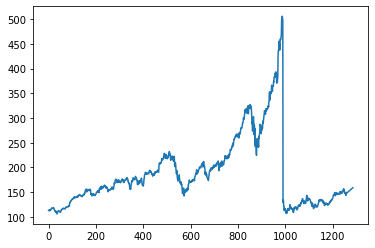

In [49]:
plt.plot(df3)